## Question 1: Building the graph and loading the data

In [10]:
from graph import Graph

graph = Graph()

# adding the nodes

with open('romania.txt', 'r') as file:
    while True:
        line = file.readline()
        if (line == ""):
            break
        # we use 4 spaces to separate the cities and numbers
        unpacked = line.split(sep="    ")
        city, lat, long = unpacked
        graph.addNode(city)

# adding the edges
graph.addUndirectedEdge("Oradea","Sibiu", 151, 151)
graph.addUndirectedEdge("Oradea","Zerind", 71, 71)
graph.addUndirectedEdge("Zerind","Arad", 75, 75)
graph.addUndirectedEdge("Arad","Sibiu", 140, 140)
graph.addUndirectedEdge("Arad","Timisoara", 118, 118)
graph.addUndirectedEdge("Timisoara","Lugoj", 111, 111)
graph.addUndirectedEdge("Lugoj","Mehadia", 70, 70)
graph.addUndirectedEdge("Mehadia","Drobeta", 75, 75)
graph.addUndirectedEdge("Craiova","Drobeta", 120, 120)
graph.addUndirectedEdge("Craiova","Rimnicu Vilcea", 146, 146)
graph.addUndirectedEdge("Giurgiu","Bucharest", 90, 90)
graph.addUndirectedEdge("Bucharest","Pitesti", 101, 101)
graph.addUndirectedEdge("Urziceni","Bucharest", 85, 85)
graph.addUndirectedEdge("Hirsova","Eforie", 86, 86)
graph.addUndirectedEdge("Hirsova","Urziceni", 98, 98)
graph.addUndirectedEdge("Vaslui","Iasi", 92, 92)
graph.addUndirectedEdge("Vaslui","Urziceni", 142, 142)
graph.addUndirectedEdge("Neamt","Iasi", 87, 87)
graph.addUndirectedEdge("Rimnicu Vilcea","Sibiu", 80, 80)
graph.addUndirectedEdge("Rimnicu Vilcea","Pitesti", 97, 97)
graph.addUndirectedEdge("Fagaras","Sibiu", 99, 99)
graph.addUndirectedEdge("Fagaras","Bucharest", 211, 211)
graph.addUndirectedEdge("Pitesti","Craiova", 138, 138)

graph.show()

{'Arad': [('Zerind', 75), ('Sibiu', 140), ('Timisoara', 118)],
 'Bucharest': [('Giurgiu', 90),
               ('Pitesti', 101),
               ('Urziceni', 85),
               ('Fagaras', 211)],
 'Craiova': [('Drobeta', 120), ('Rimnicu Vilcea', 146), ('Pitesti', 138)],
 'Drobeta': [('Mehadia', 75), ('Craiova', 120)],
 'Eforie': [('Hirsova', 86)],
 'Fagaras': [('Sibiu', 99), ('Bucharest', 211)],
 'Giurgiu': [('Bucharest', 90)],
 'Hirsova': [('Eforie', 86), ('Urziceni', 98)],
 'Iasi': [('Vaslui', 92), ('Neamt', 87)],
 'Lugoj': [('Timisoara', 111), ('Mehadia', 70)],
 'Mehadia': [('Lugoj', 70), ('Drobeta', 75)],
 'Neamt': [('Iasi', 87)],
 'Oradea': [('Sibiu', 151), ('Zerind', 71)],
 'Pitesti': [('Bucharest', 101), ('Rimnicu Vilcea', 97), ('Craiova', 138)],
 'Rimnicu Vilcea': [('Craiova', 146), ('Sibiu', 80), ('Pitesti', 97)],
 'Sibiu': [('Oradea', 151),
           ('Arad', 140),
           ('Rimnicu Vilcea', 80),
           ('Fagaras', 99)],
 'Timisoara': [('Arad', 118), ('Lugoj', 111)],
 

## Question 2: Benchmarking search algorithms on 10

In [11]:
# a function to give us a random node from a graph whenever we need it
import random
def getRandomNode(graph):
    num = random.random()
    transformed = int(num*len(graph.adjacencyList.keys()))
    return list(graph.adjacencyList.keys())[transformed]

In [12]:
# we'll be using this context manager to measure execution time throughout this assignment.

from time import time
class Timer():
    def __init__(self, timeKeeper):
        self.startTime = None
        self.endTime = None
        self.timeKeeper = timeKeeper
    def __enter__(self):
        self.startTime = time()
        
    def __exit__(self, exc_type, exc_val, exc_tb):
        self.endTime = time()
        self.timeKeeper["interval"] = self.endTime - self.startTime


In [13]:
# let's collect the 10 cities we'll need to do benchmarking.

cities = set()
for _ in range(10):
    selectedCity = getRandomNode(graph)
    while(selectedCity in cities):
        selectedCity = getRandomNode(graph)
    cities.add(selectedCity)
cities = list(cities)

print(cities)

['Eforie', 'Arad', 'Vaslui', 'Mehadia', 'Lugoj', 'Oradea', 'Neamt', 'Iasi', 'Giurgiu', 'Zerind']


In [14]:
# let's make up the 100 paths out of the 10 cities
paths = []
for start in cities:
    for end in cities:
        paths.append((start, end))

print(paths)


[('Eforie', 'Eforie'), ('Eforie', 'Arad'), ('Eforie', 'Vaslui'), ('Eforie', 'Mehadia'), ('Eforie', 'Lugoj'), ('Eforie', 'Oradea'), ('Eforie', 'Neamt'), ('Eforie', 'Iasi'), ('Eforie', 'Giurgiu'), ('Eforie', 'Zerind'), ('Arad', 'Eforie'), ('Arad', 'Arad'), ('Arad', 'Vaslui'), ('Arad', 'Mehadia'), ('Arad', 'Lugoj'), ('Arad', 'Oradea'), ('Arad', 'Neamt'), ('Arad', 'Iasi'), ('Arad', 'Giurgiu'), ('Arad', 'Zerind'), ('Vaslui', 'Eforie'), ('Vaslui', 'Arad'), ('Vaslui', 'Vaslui'), ('Vaslui', 'Mehadia'), ('Vaslui', 'Lugoj'), ('Vaslui', 'Oradea'), ('Vaslui', 'Neamt'), ('Vaslui', 'Iasi'), ('Vaslui', 'Giurgiu'), ('Vaslui', 'Zerind'), ('Mehadia', 'Eforie'), ('Mehadia', 'Arad'), ('Mehadia', 'Vaslui'), ('Mehadia', 'Mehadia'), ('Mehadia', 'Lugoj'), ('Mehadia', 'Oradea'), ('Mehadia', 'Neamt'), ('Mehadia', 'Iasi'), ('Mehadia', 'Giurgiu'), ('Mehadia', 'Zerind'), ('Lugoj', 'Eforie'), ('Lugoj', 'Arad'), ('Lugoj', 'Vaslui'), ('Lugoj', 'Mehadia'), ('Lugoj', 'Lugoj'), ('Lugoj', 'Oradea'), ('Lugoj', 'Neamt'), (

In [15]:
# let's make a structure to organize and store the experiment data

# There will be 100 paths. for each path, there will be 10 experiments.
# each experiment will contain times and costs for the different algorithms.

data = {                        # data will contain everything
    path: [                                 # path is a key. it's a tuple(startCity, destCity)
        {                                   # the value is a list of 10 dictionaries containing measured times and costs for the 10 experiments
            'times': {                      
                'bfs': [],                  # the value of "times" is a map from search name to list of times recorded for that search
                'dfs': [],
                'ucs': [],
                'greedy': [],
                'id': [],
                'bds': [],
            },
            'costs': {
                'bfs': [],
                'dfs': [],
                'ucs': [],
                'greedy': [],
                'id': [],
                'bds': [],
            },
        }
        for experiment in range(10)
    ]
    for path in paths
}


In [19]:
# now let's do the experiments and populate the data
from heuristic import Heuristic

for path in data:
    for ex in range(len(data[path])):
        # let's do dfs and record the results
        timeKeeper = {}
        with Timer(timeKeeper):
            results = graph.dfs(path[0], path[1])
            data[path][ex]['costs']['dfs'] = results["cost"]
        data[path][ex]['times']['dfs'] = timeKeeper['interval']

        # let's do bfs and record the results
        timeKeeper = {}
        with Timer(timeKeeper):
            results = graph.bfs(path[0], path[1])
            data[path][ex]['costs']['bfs'] = results["cost"]
        data[path][ex]['times']['bfs'] = timeKeeper['interval']

        # let's do ucs and record the results
        timeKeeper = {}
        with Timer(timeKeeper):
            results = graph.ucs(path[0], path[1])
            data[path][ex]['costs']['ucs'] = results["cost"]
        data[path][ex]['times']['ucs'] = timeKeeper['interval']

        # let's do bi-directional search and record the results
        timeKeeper = {}
        with Timer(timeKeeper):
            results = graph.bidirectionalSearch(path[0], path[1])
            print(results)
            data[path][ex]['costs']['bds'] = results["cost"]
        data[path][ex]['times']['bds'] = timeKeeper['interval']


None


TypeError: 'NoneType' object is not subscriptable

In [ ]:
print(data)

{('Pitesti', 'Pitesti'): [{'times': {'bfs': 0.00043129920959472656, 'dfs': 0.0002334117889404297, 'ucs': [], 'greedy': [], 'id': [], 'bds': []}, 'costs': {'bfs': 0, 'dfs': 0, 'ucs': [], 'greedy': [], 'id': [], 'bds': []}}, {'times': {'bfs': 0.00012612342834472656, 'dfs': 8.821487426757812e-05, 'ucs': [], 'greedy': [], 'id': [], 'bds': []}, 'costs': {'bfs': 0, 'dfs': 0, 'ucs': [], 'greedy': [], 'id': [], 'bds': []}}, {'times': {'bfs': 0.0001239776611328125, 'dfs': 5.364418029785156e-05, 'ucs': [], 'greedy': [], 'id': [], 'bds': []}, 'costs': {'bfs': 0, 'dfs': 0, 'ucs': [], 'greedy': [], 'id': [], 'bds': []}}, {'times': {'bfs': 0.00010395050048828125, 'dfs': 5.5789947509765625e-05, 'ucs': [], 'greedy': [], 'id': [], 'bds': []}, 'costs': {'bfs': 0, 'dfs': 0, 'ucs': [], 'greedy': [], 'id': [], 'bds': []}}, {'times': {'bfs': 0.00010395050048828125, 'dfs': 5.412101745605469e-05, 'ucs': [], 'greedy': [], 'id': [], 'bds': []}, 'costs': {'bfs': 0, 'dfs': 0, 'ucs': [], 'greedy': [], 'id': [], 'b

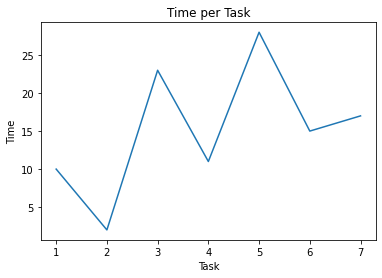

In [ ]:
import matplotlib.pyplot as plt

tasks = [1, 2, 3, 4, 5, 6, 7]
times = [10, 2, 23, 11, 28, 15, 17]

plt.plot(tasks, times)
plt.xlabel('Task')
plt.ylabel('Time')
plt.title('Time per Task')
plt.show()

In [ ]:
def populateGraph(graph: Graph, numNodes: int, numEdges: int, maxCost=1):
    # add nodes to the graph
    for i in range(numNodes):
        graph.addNode(str(i))
    # add edges to the graph
    for i in range(numEdges):
        node1 = str(random.randint(0, numNodes - 1))
        node2 = str(random.randint(0, numNodes - 1))
        cost = random.randint(1, maxCost)
        # make sure we don't add a self-loop or duplicate edge
        while node1 == node2 or graph.undirectedEdgeExists(node1, node2):
            node1 = str(random.randint(0, numNodes - 1))
            node2 = str(random.randint(0, numNodes - 1))
            cost = random.randint(1, maxCost)
        graph.addUndirectedEdge(node1, node2, cost, cost)

In [ ]:
bigGraph = Graph()
populateGraph(bigGraph, numNodes=100000, numEdges=200000)

In [ ]:
node1 = getRandomNode(graph)
node2 = getRandomNode(graph)
while(node1 == node2):
    node2 = getRandomNode(bigGraph)
print("dfs:")
with Timer():
    result = graph.dfs(node1, node2)
    print(result["path"], "\n", result["cost"])

print()

print("ucs:")
with Timer():
    result = graph.ucs(node1, node2)
    print(result["path"], "\n", result["cost"])

print()

print("bfs:")
with Timer():
    result = graph.bfs(node1, node2)
    print(result["path"], "\n", result["cost"])



dfs:


TypeError: Timer.__init__() missing 1 required positional argument: 'timeKeeper'

[('20778', 1), ('89025', 1), ('22139', 1), ('31929', 1)]

In [ ]:
random.randint(1,1)

1